In [2]:
## Python packages - you may have to pip install sqlalchemy, sqlalchemy_utils, and psycopg2.
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2
import pandas as pd
#In Python: Define a database name (we're using a dataset on births, so I call it 
# birth_db), and your username for your computer (CHANGE IT BELOW). 
dbname = 'bills_db'
username = 'Joel'
## 'engine' is a connection to a database
## Here, we're using postgres, but sqlalchemy can connect to other things too.
engine = create_engine('postgres://%s@localhost/%s'%(username,dbname))
print engine.url

postgres://Joel@localhost/bills_db


In [3]:
## Now try the same queries, but in python!

# connect:
con = None
con = psycopg2.connect(database = dbname, user = username)

# query:
sql_query = """
SELECT * FROM us_bills;
"""
us_bills = pd.read_sql_query(sql_query,con)

us_bills.head()

,bill_num,bill_name,bill_text,top_subject
0,hconres1-114,Regarding consent to assemble outside the seat...,"{""\n"",""[Congressional Bills 114th Congress]\n""...",Congress
1,hconres10-114,Recognizing the challenges and burdens associa...,"{""\n"",""[Congressional Bills 114th Congress]\n""...",Education
2,hconres100-114,Expressing the sense of the Congress regarding...,"{""\n"",""[Congressional Bills 114th Congress]\n""...",International affairs
3,hconres101-114,Supporting the Association of American Veterin...,"{""\n"",""[Congressional Bills 114th Congress]\n""...",Education
4,hconres102-114,Providing for a joint session of Congress to r...,"{""\n"",""[Congressional Bills 114th Congress]\n""...",Congress


In [9]:
us_bills.iloc[0]['bill_text']

'{"\n","[Congressional Bills 114th Congress]\n","[From the U.S. Government Printing Office]\n","[H. Con. Res. 1 Received in Senate (RDS)]\n","\n","114th CONGRESS\n","  1st Session\n","H. CON. RES. 1\n","\n","\n","_______________________________________________________________________\n","\n","\n","                   IN THE SENATE OF THE UNITED STATES\n","\n","                            January 7, 2015\n","\n","                                Received\n","\n","_______________________________________________________________________\n","\n","                         CONCURRENT RESOLUTION\n","\n","\n"," \n","     Regarding consent to assemble outside the seat of government.\n","\n","    Resolved by the House of Representatives (the Senate concurring), \n","That pursuant to clause 4, section 5, article I of the Constitution, \n","during the One Hundred Fourteenth Congress the Speaker of the House and \n","the Majority Leader of the Senate or their respective designees, acting \n","jointly 

In [11]:
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

/Users/Joel/anaconda/envs/insight/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [14]:
bill_text = us_bills['bill_text']
bill_text.shape

(10933,)

In [17]:
words = [bill.split() for bill in bill_text]

In [27]:
import re
refined_words = [re.sub(r'[\W_]+','',s).lower() for word in words for s in word]

In [38]:
no_empties = [x for x in refined_words if len(x) > 3]

In [41]:
len(no_empties)

13009999

In [46]:
wordcloud = WordCloud().generate(reduce(lambda a, b: a + " " + b, no_empties[0:100000]))

(-0.5, 399.5, 199.5, -0.5)

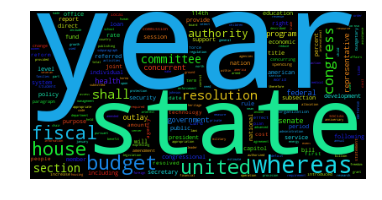

In [47]:
plt.imshow(wordcloud)
plt.axis("off")

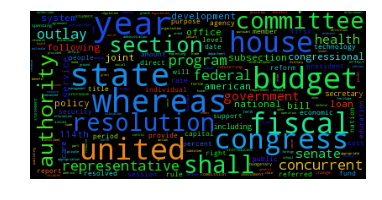

In [48]:
wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(reduce(lambda a,b: a+" "+b,no_empties[0:100000]))
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
vect = CountVectorizer()
vect.fit(bill_text)
vect.get_feature_names()

[u'00',
 u'000',
 u'0000',
 u'000005042',
 u'00007',
 u'0001',
 u'0002',
 u'0003',
 u'00034',
 u'0005',
 u'000in',
 u'000mi',
 u'000th',
 u'001',
 u'00168',
 u'002',
 u'00200',
 u'0025',
 u'0028',
 u'002a',
 u'003',
 u'0030',
 u'00315',
 u'0035',
 u'0039',
 u'004',
 u'00436',
 u'005',
 u'00506',
 u'00549',
 u'0056',
 u'006',
 u'0060',
 u'0067',
 u'007',
 u'008',
 u'0080',
 u'00801',
 u'0081',
 u'0082',
 u'0083',
 u'009',
 u'0090',
 u'01',
 u'010',
 u'0100',
 u'0101',
 u'0101113f',
 u'0101122f',
 u'0101125f',
 u'0101126f',
 u'0101127f',
 u'0101213f',
 u'0101221n',
 u'0101224n',
 u'0101226n',
 u'0101313f',
 u'0101314f',
 u'0101316f',
 u'0101402n',
 u'0102110f',
 u'0102326f',
 u'0105921f',
 u'0106',
 u'01080',
 u'011',
 u'0117',
 u'012',
 u'01247',
 u'012a',
 u'013',
 u'01367',
 u'013b',
 u'014',
 u'014a',
 u'015',
 u'015a',
 u'016',
 u'016a',
 u'017',
 u'0172',
 u'0178',
 u'018',
 u'01832',
 u'0189',
 u'019',
 u'019a',
 u'01b',
 u'01h',
 u'01rv14136',
 u'02',
 u'020',
 u'0202',
 u'020242

In [52]:
simple_train_dtm = vect.transform(bill_text)
simple_train_dtm

<10933x55476 sparse matrix of type '<type 'numpy.int64'>'
	with 3754520 stored elements in Compressed Sparse Row format>

In [54]:
us_bills['international_affairs']=0

In [103]:
us_bills['marine_and_inland_water_transportation'] = 0

In [104]:
us_bills.head()

,bill_num,bill_name,bill_text,top_subject,international_affairs,marine_and_inland_water_transportation
0,hconres1-114,Regarding consent to assemble outside the seat...,"{""\n"",""[Congressional Bills 114th Congress]\n""...",Congress,0,0
1,hconres10-114,Recognizing the challenges and burdens associa...,"{""\n"",""[Congressional Bills 114th Congress]\n""...",Education,0,0
2,hconres100-114,Expressing the sense of the Congress regarding...,"{""\n"",""[Congressional Bills 114th Congress]\n""...",International affairs,0,0
3,hconres101-114,Supporting the Association of American Veterin...,"{""\n"",""[Congressional Bills 114th Congress]\n""...",Education,0,0
4,hconres102-114,Providing for a joint session of Congress to r...,"{""\n"",""[Congressional Bills 114th Congress]\n""...",Congress,0,0


In [94]:
# query:
sql_query = """
SELECT bill_num, subject FROM bill_subject WHERE subject='International affairs' OR subject='International Affairs';
"""
international_terms = pd.read_sql_query(sql_query,con)

In [100]:
# query:
sql_query = """
SELECT bill_num, subject FROM bill_subject WHERE subject='Marine and inland water transportation';
"""
marine_terms = pd.read_sql_query(sql_query,con)

In [101]:
marine_terms

,bill_num,subject
0,hr1056-114,Marine and inland water transportation
1,hr1135-114,Marine and inland water transportation
2,hr1248-114,Marine and inland water transportation
3,hr1288-114,Marine and inland water transportation
4,hr1308-114,Marine and inland water transportation
5,hr142-114,Marine and inland water transportation
6,hr1540-114,Marine and inland water transportation
7,hr1665-114,Marine and inland water transportation
8,hr1735-114,Marine and inland water transportation
9,hr1804-114,Marine and inland water transportation


In [112]:
us_bills.ix[us_bills['bill_num'].isin(marine_terms['bill_num']), 'marine_and_inland_water_transportation'] = 1

In [116]:
X = us_bills['bill_text']
y = us_bills['marine_and_inland_water_transportation']

In [117]:
# split into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [118]:
# import and instantiate the vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [119]:
# fit and transform X_train, but only transform X_test
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [120]:
# import/instantiate/fit
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [121]:
# make class predictions
y_pred_class = nb.predict(X_test_dtm)

In [122]:
# calculate accuracy
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.966349670812


In [124]:
# predict class probabilities
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]

In [143]:
y_test[y_test == 1]

5850    1
7602    1
7454    1
8454    1
2954    1
8211    1
8082    1
1443    1
8110    1
3027    1
7816    1
7920    1
9802    1
7709    1
916     1
7326    1
4852    1
9797    1
3432    1
443     1
6484    1
1206    1
6238    1
5493    1
7853    1
6504    1
4269    1
1859    1
1984    1
3701    1
642     1
7555    1
8956    1
3449    1
8999    1
Name: marine_and_inland_water_transportation, dtype: int64

In [126]:
# calculate the AUC using y_test_binary and y_pred_prob
print metrics.roc_auc_score(y_test, y_pred_prob)

0.799719472821


In [127]:
%matplotlib inline
import matplotlib.pyplot as plt

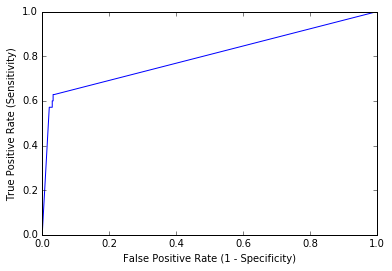

In [129]:
# plot ROC curve using y_test_binary and y_pred_prob
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [130]:
print metrics.confusion_matrix(y_test, y_pred_class)

[[2622   77]
 [  15   20]]


In [131]:
# first 10 false positives (meaning they were incorrectly classified as 5-star reviews)
X_test[y_test < y_pred_class][:10]

9574    {"\n","[Congressional Bills 114th Congress]\n"...
1777    {"\n","[Congressional Bills 114th Congress]\n"...
2106    {"\n","[Congressional Bills 114th Congress]\n"...
941     {"\n","[Congressional Bills 114th Congress]\n"...
8119    {"\n","[Congressional Bills 114th Congress]\n"...
9110    {"\n","[Congressional Bills 114th Congress]\n"...
4803    {"\n","[Congressional Bills 114th Congress]\n"...
7267    {"\n","[Congressional Bills 114th Congress]\n"...
4467    {"\n","[Congressional Bills 114th Congress]\n"...
9248    {"\n","[Congressional Bills 114th Congress]\n"...
Name: bill_text, dtype: object

In [139]:
len(X_test[y_test < y_pred_class])

77

In [132]:
X_test[9574]

'{"\n","[Congressional Bills 114th Congress]\n","[From the U.S. Government Printing Office]\n","[S. 327 Introduced in Senate (IS)]\n","\n","114th CONGRESS\n","  1st Session\n","                                 S. 327\n","\n","  To provide for auditable financial statements for the Department of \n","                    Defense, and for other purposes.\n","\n","\n","_______________________________________________________________________\n","\n","\n","                   IN THE SENATE OF THE UNITED STATES\n","\n","                            February 2, 2015\n","\n","Mr. Manchin (for himself, Mr. Paul, Mr. Wyden, and Mr. Cruz) introduced \n","the following bill; which was read twice and referred to the Committee \n","                           on Armed Services\n","\n","_______________________________________________________________________\n","\n","                                 A BILL\n","\n","\n"," \n","  To provide for auditable financial statements for the Department of \n","      

In [138]:
us_bills.ix[9574]

bill_num                                                                           s327-114
bill_name                                 A bill to provide for auditable financial stat...
bill_text                                 {"\n","[Congressional Bills 114th Congress]\n"...
top_subject                                              Armed forces and national security
international_affairs                                                                     0
marine_and_inland_water_transportation                                                    0
Name: 9574, dtype: object

In [133]:
# first 10 false negatives (meaning they were incorrectly classified as 1-star reviews)
X_test[y_test > y_pred_class][:10]

5850    {"\n","[Congressional Bills 114th Congress]\n"...
2954    {"\n","[Congressional Bills 114th Congress]\n"...
8211    {"\n","[Congressional Bills 114th Congress]\n"...
8110    {"\n","[Congressional Bills 114th Congress]\n"...
3027    {"\n","[Congressional Bills 114th Congress]\n"...
7920    {"\n","[Congressional Bills 114th Congress]\n"...
7326    {"\n","[Congressional Bills 114th Congress]\n"...
9797    {"\n","[Congressional Bills 114th Congress]\n"...
443     {"\n","[Congressional Bills 114th Congress]\n"...
6484    {"\n","[Congressional Bills 114th Congress]\n"...
Name: bill_text, dtype: object

In [136]:
X_test[2954]

'{"\n","[Congressional Bills 114th Congress]\n","[From the U.S. Government Printing Office]\n","[H.R. 337 Introduced in House (IH)]\n","\n","114th CONGRESS\n","  1st Session\n","                                H. R. 337\n","\n"," To provide limitations on maritime liens on fishing permits, and for \n","                            other purposes.\n","\n","\n","_______________________________________________________________________\n","\n","\n","                    IN THE HOUSE OF REPRESENTATIVES\n","\n","                            January 13, 2015\n","\n"," Mr. Young of Alaska introduced the following bill; which was referred \n","         to the Committee on Transportation and Infrastructure\n","\n","_______________________________________________________________________\n","\n","                                 A BILL\n","\n","\n"," \n"," To provide limitations on maritime liens on fishing permits, and for \n","                            other purposes.\n","\n","    Be it enacted by

In [137]:
us_bills.ix[2954]

bill_num                                                                          hr337-114
bill_name                                 To provide limitations on maritime liens on fi...
bill_text                                 {"\n","[Congressional Bills 114th Congress]\n"...
top_subject                                                 Transportation and public works
international_affairs                                                                     0
marine_and_inland_water_transportation                                                    1
Name: 2954, dtype: object

In [144]:
# don't convert to lowercase, we end up with more features
vect = CountVectorizer(lowercase=False)
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(8199, 72284)

In [145]:
# include 1-grams and 2-grams, we end up with many features
vect = CountVectorizer(lowercase=False, ngram_range=(1, 2),stop_words='english')
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(8199, 1436064)

In [146]:
# create document-term matrices
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# use Naive Bayes to predict the star rating
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

# calculate accuracy
print metrics.accuracy_score(y_test, y_pred_class)

0.984637893197


In [147]:
# predict class probabilities
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]

In [148]:
print metrics.confusion_matrix(y_test, y_pred_class)

[[2680   19]
 [  23   12]]
